In [116]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [429]:
def plot_complex_grid(z,plot_func=False,step=1):
    if not plot_func:
        plot_func=plt.plot
    x = np.real(z); 
    y = np.imag(z);
    w,h = x.shape;
    for i in range(0,w,step):
        plot_func(x[i,:],y[i,:],c='#999999',lw=.5)
    for j in range(0,h,step):
        plot_func(x[:,j],y[:,j],c='#999999',lw=.5)
    

In [358]:
n = 500
eps = 1E-10

x = np.linspace(-2*np.pi+eps,2*np.pi+eps,4*n)
y = np.linspace(eps,np.pi+eps,n)

x,y = np.meshgrid(x,y)
z = x+1j*y

In [384]:
def periodify(period=2*np.pi,add_offset_back=False): #decorator to ensure functions are periodic 
    def real_decorator(f):
        def periodified(value,*args,**kwargs):
            add_offset = 1 if add_offset_back else 0;
            r = np.real(value)
            offset = r-r%period
            return f(value-offset,*args,**kwargs)+offset*add_offset
        return periodified
    return real_decorator

In [395]:
@periodify(period = np.pi,add_offset_back=True) 
def slit_map(x,t=0):
    return np.arccos(np.exp(-t)*np.cos(x))

@periodify(period = np.pi,add_offset_back=False) #ensures a function with 'arcos' is made periodic 
def derivative (x,t=0):
    return np.abs(np.exp(-t)*np.sin(x)/np.sqrt(1-np.exp(-2*t)*np.cos(x)**2+1E-10j))

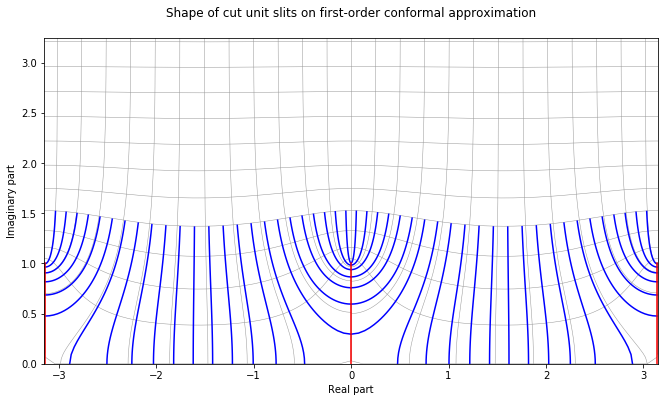

In [437]:
plt.figure(figsize = (11,6))
t = -.44 #we are using the map that goes from the Half plane to half plane with slits and not viceversa (negative time)
step = 40 #we plot only one of every x lines to make it clearer

plot_complex_grid(slit_map(z,t),step=step) #plot the image of a grid by the conformal map

for x in np.linspace(-np.pi,np.pi,50):
    line = slit_map(np.linspace(x+1E-5j,x+1j),t)
    plt.plot(np.real(line),np.imag(line),'b')

for k in (-2,-1,0,1,2):
    plt.plot([k*np.pi,k*np.pi],
             [0,np.imag(slit_map(1E-8+1E-4j,t))],
             'r-') #plot the slits we cut with the conformal map
plt.xlim(-3.15,3.15)
plt.ylim(0,3.25)


plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Shape of cut unit slits on first-order conformal approximation\n')
plt.savefig('cut_slits.png',dpi=250)

(-1, 1)

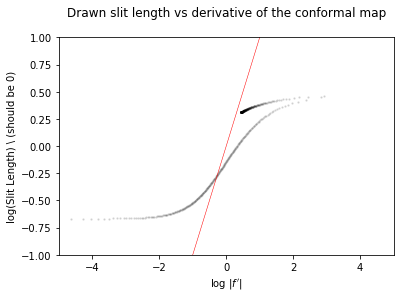

In [444]:
x = np.linspace(1E-3,np.pi/2-1E-10,500)+(1E-3)*1j
fx = slit_map(x,t)
df = derivative(x,t)
slit_tip = slit_map(x+1j,t)
distance = np.abs(slit_tip-fx)

plt.plot([-5,5],[-5,5],c='r',lw=.5)
plt.scatter(np.log(df),np.log(distance),c='k',s=2,alpha=.1)
plt.xlabel("log $|f'|$")
plt.ylabel("log(Slit Length) \\ (should be 0)")
plt.title('Drawn slit length vs derivative of the conformal map\n')


plt.xlim(-5,5)
plt.ylim(-1,1)

(-5, 2.5)

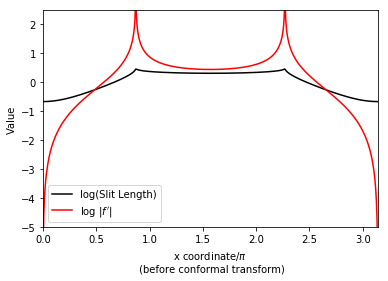

In [425]:
x = np.linspace(1E-3,np.pi-1E-10,500)+(1E-3)*1j
fx = slit_map(x,t)
df = derivative(x,t)
slit_tip = slit_map(x+1j,t)
distance = np.abs(slit_tip-fx)

plt.plot(np.real(x),np.log(distance),'k',label = "log(Slit Length)")
plt.plot(np.real(x),np.log(df),'r',label = "log $|f'|$")

plt.xlim(0,np.pi)
plt.legend()

plt.ylabel('Value')
plt.xlabel('x coordinate/$\pi$\n (before conformal transform)')
plt.ylim(-5,2.5)

In [426]:
def slit_fdf(xdx,t=0):
    x,dx = xdx
    return (slit_map(x),derivative(x)*dx)
def translate(xdx,trans = 0):
    x,dx = xdx
    return (x+trans,dx)

In [ ]:
random_translations = 